# Multilayer ANNs

Mathematically:

First layer: $l_1 = \sigma({x^T_0.w_1})$  

Second layer:  $l_2 = \sigma({l_1^T.w_2}) = \sigma({\sigma({x^T_0.w_1})^T.w_2}) $  

and so on....

and final output, $\hat{y} = \sigma(w_n.(....(\sigma({\sigma({x^T_0.w_1})^T.w_2})^T...)^T)^T)$

Where 

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
# Creating Data

npc = 100 # 100 points per cluster 
blur = 1  # standard dev. to spread out the data

A = [1, 3]   # Centers of clusters
B = [1, -2]

# Generating data
a = [A[0] + np.random.randn(npc)*blur, A[1] + np.random.randn(npc)*blur]
b = [B[0] + np.random.randn(npc)*blur, B[1] + np.random.randn(npc)*blur]

# True labels
labels = np.vstack((np.zeros((npc, 1)), np.ones((npc, 1))))

# Concatenating into a matrix
data = np.hstack((a,b)).T

# convert to tensor
labels = torch.tensor(labels).float()
data = torch.tensor(data).float()

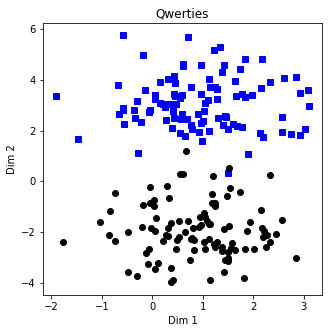

In [21]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('Qwerties')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

## Adding more layers to NN

Number of hidden layers and neurons in each layer are subject to user's choice

In [22]:
# Model Architecture

def ANNModel(lr):
    
    ANN = nn.Sequential(
        nn.Linear(2,16),    # input layer with 2 inputs, calculates Wx + b
        nn.ReLU(),
        
        nn.Linear(16,1),    # Hidden Layer
        nn.ReLU(),
        
        nn.Linear(1,1),     # Output layer - one output feature
        nn.Sigmoid()        # Final activation unit
    )
    
    lossfn = nn.BCELoss()   # better to use with BCEWithLogits loss
    
    optim = torch.optim.SGD(ANN.parameters(), lr = lr)    # optimizer to learn model(ANN) parameters
    
    return ANN, lossfn, optim
    

### Training the model

In [23]:
nEp = 1000

def trainModel(ANN):
    
    losses = torch.zeros(nEp)
    
    for i in range(nEp):
        y = ANN(data)
        
        loss = lossfn(y, labels)
        losses[i] = loss
        
        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()
    
    # predictions after training
    pred = ANN(data)
    
    acc = 100 * torch.mean(((pred > 0.5) == labels).float())
    
    return losses, pred, acc      

Final accuracy : tensor(98.5000)


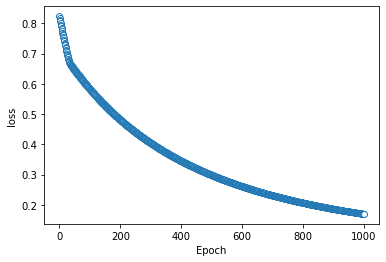

In [24]:
ANN, lossfn, optim = ANNModel(.01)

losses, pred, acc = trainModel(ANN)

print('Final accuracy :', acc.data)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('loss')
plt.show()

### Testing on various lr

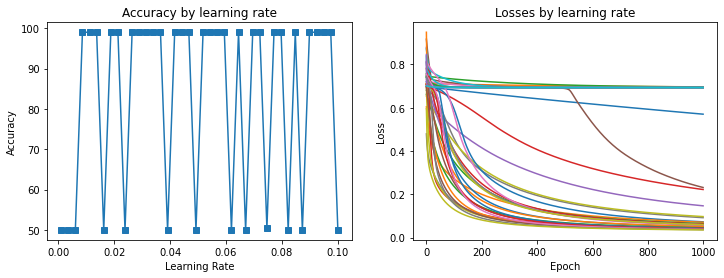

In [28]:
lr = np.linspace(0.001, 0.1, 40)

lr_acc = [] # accuracy by LR
all_loss = np.zeros((len(lr), nEp))

for i, lnr in enumerate(lr):
    ANN, lossfn, optim = ANNModel(lnr)
    losses, pred, acc = trainModel(ANN)
    
    lr_acc.append(acc)
    all_loss[i, :] = losses.detach()  


fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(lr, lr_acc, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(all_loss.T)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learning rate')
plt.show()

In [29]:
sum(torch.tensor(lr_acc) > 70)/len(lr_acc)

tensor(0.6750)

# Multi output ANN with Iris data

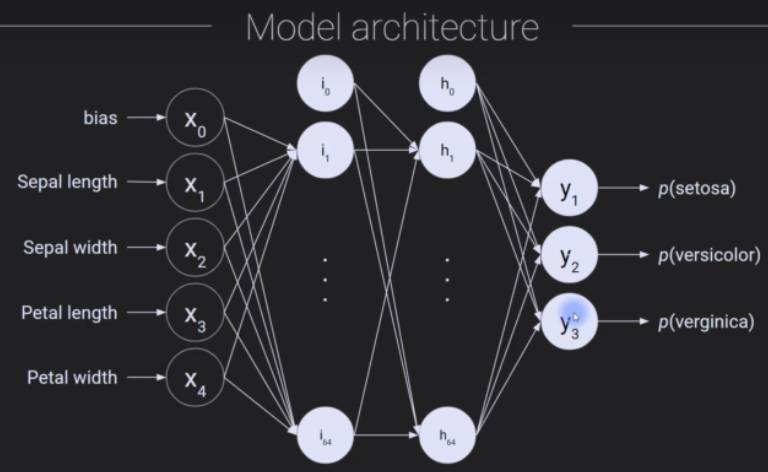

__Fully Connected__ - Each node in layer __n__ projects to each node in layer __n+1__. Each connection has its own weight.

For Multiclass classification, we do not use sigmoid for projecting final output, we use __softmax__ function:

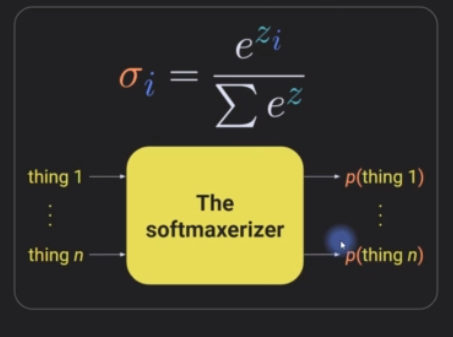

It gives some of all probabilities of classes as 1

In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


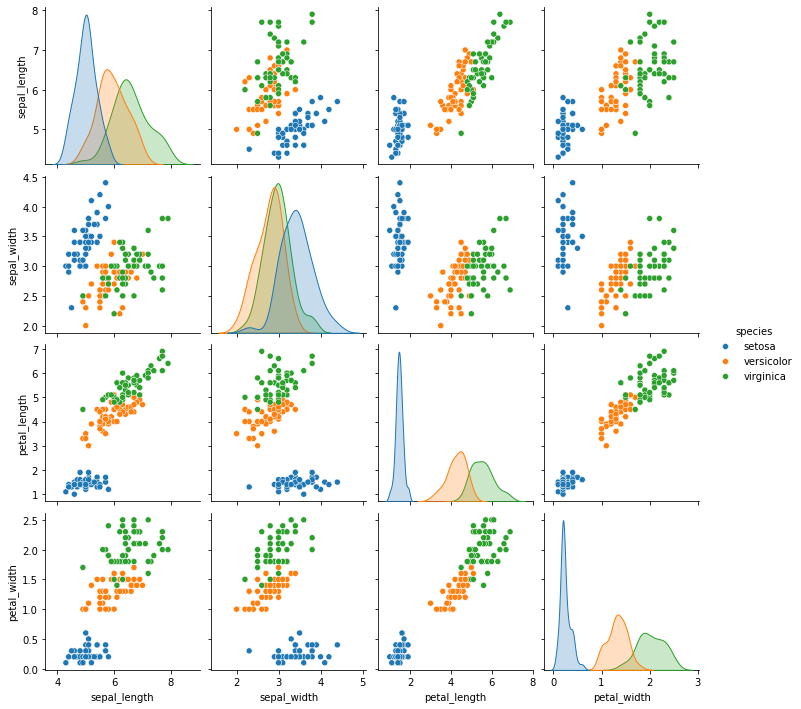

In [7]:
sns.pairplot(iris, hue='species')
plt.show()